머신러닝의 성능을 비약적으로 향상시킨 '앙상블(Ensemble) 학습'의 첫 번째 파트, 배깅(Bagging)과 랜덤 포레스트(Random Forest)를 다룬다.

이 시간의 핵심은 "한 명의 천재(Decision Tree)보다 백 명의 평범한 사람(Forest)의 지혜가 낫다"는 집단 지성(Collective Intelligence)의 원리를 이해하고, 헬스케어 데이터에서 가장 신뢰받는 알고리즘인 랜덤 포레스트가 어떻게 다양성을 확보하는지 상세히 알아본다.

---

# 📘 [3차] 4.1. 앙상블 학습과 랜덤 포레스트: 집단 지성으로 과적합을 이기다

## 1. 한 명의 천재보다 백 명의 범재가 낫다: 앙상블의 철학

### 1) 의사결정나무의 치명적 약점: 불안정성
2일차 2교시에 배웠던 의사결정나무(Decision Tree)를 떠올려 보자. 이 모델은 스무고개처럼 질문을 던지며 정답을 찾아가는 아주 똑똑하고 설명력이 좋은 모델이다. 하지만 치명적인 단점이 하나 있다. 바로 '성격이 너무 예민하다(High Variance)'는 것이다.

*   상황: 학습 데이터에 아주 작은 노이즈(오타나 특이한 환자)가 하나 섞여 들어갔다.
*   결과: 나무의 가지치기 방향이 완전히 달라진다. 뿌리 질문부터 바뀌어버릴 수도 있다. 즉, 학습 데이터가 조금만 바뀌어도 모델의 구조와 예측 결과가 요동친다. 이를 '과적합(Overfitting)되기 쉽다'고 표현한다.

의료 현장에서 이런 불안정한 모델을 쓸 수 있을까?
"어제는 이 환자를 암이라고 했는데, 오늘 데이터 하나 추가하고 다시 학습했더니 정상이라고 하네요?"
이런 AI 의사는 신뢰할 수 없다. 우리는 '안정적이고(Stable)', '강건한(Robust)' 모델이 필요하다.

### 2) 집단 지성(Collective Intelligence)의 도입
여기서 앙상블(Ensemble)의 아이디어가 등장한다. 앙상블은 프랑스어로 '조화' 또는 '통일'을 뜻하며, 음악에서는 합주를 의미한다. 머신러닝에서는 "여러 개의 모델을 조화롭게 합쳐서 더 나은 예측을 하는 기법"을 말한다.

헬스케어 상황에 비유해 보자.
*   단일 모델 (Single Model): 아주 똑똑하지만 컨디션 기복이 심한 명의 한 명에게 진단을 맡긴다. 그가 실수하면 대책이 없다.
*   앙상블 (Ensemble): 100명의 의사로 구성된 '종양 위원회(Tumor Board)'를 소집한다. 100명이 각자 진단을 내리고, 다수결(Voting)로 최종 병명을 확정한다.
    *   의사 A는 피곤해서 오진할 수 있다.
    *   의사 B는 편견이 있어서 오진할 수 있다.
    *   하지만 100명 중 90명 이상이 동시에 똑같은 실수를 할 확률은 수학적으로 매우 낮다.
    *   서로의 실수를 상쇄(Compensate)함으로써 전체적인 진단 정확도는 올라가고 실수는 줄어든다.

이것이 앙상블 학습의 핵심 철학이다. "약한 학습기(Weak Learner) 여러 개를 합치면 강한 학습기(Strong Learner)가 된다."

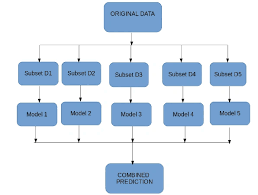
---

## 2. 배깅(Bagging): 따로 공부해서 투표하자

그렇다면 100명의 의사(모델)를 어떻게 구성할 것인가? 만약 100명이 똑같은 교과서(데이터)로 똑같은 방식으로 공부했다면 어떨까? 그들은 모두 똑같은 환자에게서 똑같은 실수를 할 것이다. 앙상블이 성공하기 위한 필수 조건은 '다양성(Diversity)'이다. 서로 다른 관점을 가져야 한다.

이 다양성을 확보하기 위해 배깅(Bagging)이라는 기법을 사용한다. 배깅은 Bootstrap Aggregating의 줄임말이다.

### 1) 부트스트랩(Bootstrap): 데이터를 무작위로 복제하다
다양성을 만드는 가장 쉬운 방법은, 모델마다 공부하는 데이터(교과서)를 다르게 주는 것이다. 하지만 우리에게 있는 데이터는 하나뿐이다. 어떻게 다르게 줄 수 있을까? 바로 복원 추출(Sampling with replacement)을 통해서다.

전체 환자가 10명(1번~10번) 있다고 가정하자.
*   의사 A의 데이터: 주머니에서 제비뽑기로 10명을 뽑는다. 뽑고 나서 다시 주머니에 넣는다.
    *   결과: [1, 2, 2, 3, 5, 5, 5, 8, 9, 10] (2번과 5번 환자는 중복되어 여러 번 뽑혔고, 4번과 6번, 7번은 뽑히지 않았다.)
*   의사 B의 데이터: 다시 10명을 뽑는다.
    *   결과: [1, 3, 4, 4, 6, 7, 8, 9, 10, 10]
*   의사 C의 데이터: ...

이렇게 하면 각 의사(모델)는 전체 데이터의 부분집합을 보게 된다. 어떤 의사는 중증 환자를 더 많이 보고, 어떤 의사는 경증 환자를 더 많이 보게 된다. 즉, 세상을 바라보는 시야가 미묘하게 다른 100명의 전문가가 탄생하는 것이다.

### 2) 어그리게이팅(Aggregating): 의견을 하나로 모으다
이제 100명의 모델이 각자 학습을 마쳤다. 새로운 환자가 왔을 때 진단을 어떻게 내릴까?
*   분류(Classification) 문제: 다수결 투표(Hard Voting)를 한다.
    *   "암이다": 80표 / "정상이다": 20표 $\rightarrow$ 최종 결론: 암
    *   혹은 확률을 평균 내는 소프트 보팅(Soft Voting)을 하기도 한다.
*   회귀(Regression) 문제: 평균(Average)을 낸다.
    *   예측값: 3일, 5일, 4일 ... $\rightarrow$ 평균: 4일

이 과정을 통해 개별 모델의 과적합(튀는 값)은 평균에 묻혀 사라지고, 일반화된 결론만 남게 된다.
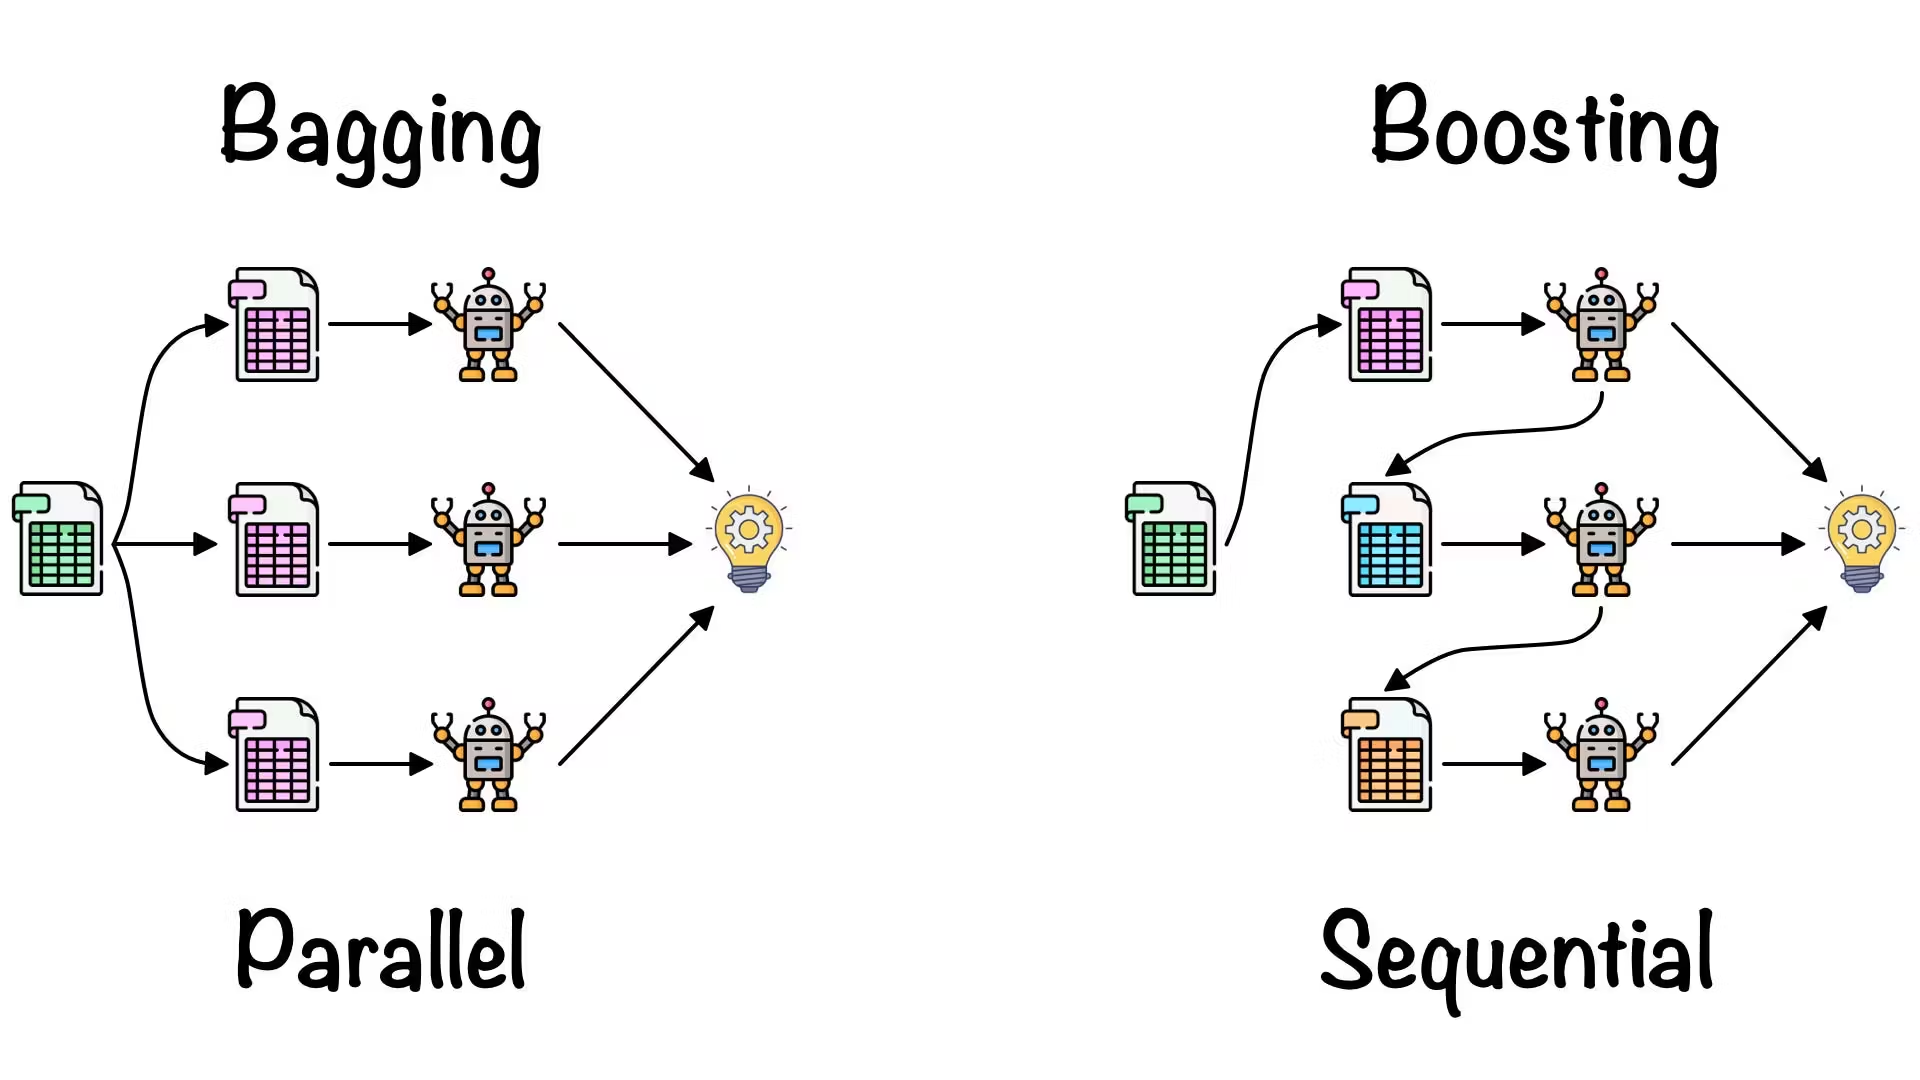
---

## 3. 랜덤 포레스트(Random Forest): 무작위성의 숲

랜덤 포레스트는 배깅(Bagging) 기법을 의사결정나무(Tree)에 적용한 알고리즘이다. 이름 그대로 "무작위(Random)로 심은 나무들의 숲(Forest)"이다.
그런데 랜덤 포레스트는 배깅보다 한 단계 더 진화했다. 단순히 데이터만 다르게 주는 것으로는 부족하다고 생각했기 때문이다.

### 1) 왜 배깅만으로는 부족한가? (상관관계의 문제)
데이터에 아주 강력한 지표가 하나 있다고 치자.
*   상황: 심장병을 예측하는데, 변수 중에 '심장 통증 유무'라는 압도적인 변수가 있다.
*   문제: 부트스트랩으로 데이터를 조금 다르게 줘도, 모든 나무들은 결국 첫 번째 질문으로 "심장이 아픈가요?"를 선택하게 된다.
*   결과: 100그루의 나무를 심었는데, 다들 비슷비슷하게 생긴 나무가 되어버린다. 다양성이 사라진다. 서로 비슷한 친구들끼리 모이면 집단 지성이 발휘되지 않는다.

### 2) 무작위성의 극대화: 변수(Feature)도 제비뽑기하자
랜덤 포레스트는 여기서 기발한 제약을 하나 더 추가한다.
> "나무가 질문(분기)을 만들 때, 전체 변수를 다 보지 말고 무작위로 일부만 뽑아서 그중에서 골라라."

*   일반 트리: 전체 30개 변수 중 가장 좋은 것 선택. (항상 '심장 통증'이 뽑힘)
*   랜덤 포레스트: 이번 분기점에서는 무작위로 뽑은 5개 변수(나이, 키, 혈당...)만 후보로 쓴다. '심장 통증'은 후보에 없다.
    *   그러면 나무는 어쩔 수 없이 '혈당'이나 '나이'를 기준으로 질문을 만든다.
    *   다음 분기점에서는 또 다른 5개를 뽑는다.

이렇게 강제로 '왕따 변수'를 만들고 '마이너 변수'에게 기회를 주면, 숲속의 나무들은 서로 완전히 다른 모양으로 자라나게 된다.
*   어떤 나무는 혈액 검사 위주로 판단하고,
*   어떤 나무는 신체 계측 위주로 판단한다.

이 서로 다른 개성을 가진 나무들이 투표를 했을 때, 비로소 편향되지 않고 균형 잡힌 강력한 성능이 나온다. 이것이 랜덤 포레스트가 머신러닝의 제왕으로 불리는 이유다.

---

## 4. OOB (Out-of-Bag) 데이터: 버려진 데이터의 재발견

랜덤 포레스트에는 헬스케어 데이터 분석에 아주 유용한 보너스 기능이 있다. 바로 OOB Score이다.

### 1) 선택받지 못한 자들
부트스트랩(복원 추출)을 하다 보면, 통계적으로 약 36.8%의 데이터는 주머니에서 한 번도 뽑히지 않는다. 이들을 가방 밖(Out-of-Bag)에 남겨진 데이터, 즉 OOB 샘플이라고 한다.

### 2) 공짜 검증 세트 (Validation Set)
우리는 보통 모델 성능을 평가하기 위해 귀중한 데이터를 떼어서 '검증 세트'를 따로 만든다. 하지만 랜덤 포레스트에서는 그럴 필요가 없다.
*   각 나무마다 훈련에 쓰지 않은 OOB 샘플들이 있다.
*   이 OOB 샘플을 그 나무에 넣어서 맞추는지 틀리는지 테스트해 본다.
*   모든 나무에 대해 이 과정을 거쳐 평균을 내면, 별도의 테스트 데이터를 쓰지 않고도 모델의 성능을 정확하게 검증할 수 있다.

데이터 하나하나가 소중하고 비싼 의료 분야에서, 데이터를 낭비하지 않고 알뜰하게 검증까지 마칠 수 있다는 것은 엄청난 장점이다.

---

## 5. 헬스케어에서 랜덤 포레스트가 사랑받는 이유

딥러닝이 등장한 이후에도 병원에서는 여전히 랜덤 포레스트를 많이 사용한다. 그 이유는 명확하다.

1.  실패하지 않는다 (안정성): 하이퍼파라미터 튜닝을 대충 해도 기본 이상은 한다. 과적합이 잘 일어나지 않는다. 초보자가 쓰기에 가장 안전한 알고리즘이다.
2.  설명 가능하다 (변수 중요도): 100그루의 나무가 공통적으로 "이 변수가 중요하다"고 지목한다면 그것은 진짜다.
    *   랜덤 포레스트는 각 변수가 불순도를 낮추는 데 얼마나 기여했는지 평균을 내어 '변수 중요도(Feature Importance)'를 제공한다.
    *   의사에게 "AI가 왜 그렇게 판단했나요?"라고 물었을 때, "이 모델은 백혈구 수치와 체온을 가장 중요하게 봤습니다"라고 근거를 제시할 수 있다.
3.  데이터 가공이 쉽다: 스케일링(정규화)을 안 해도 잘 작동한다. 이상치나 결측치가 좀 있어도 앙상블의 힘으로 극복해낸다.

---

## 6. 요약:

1.  앙상블(Ensemble): 여러 개의 약한 모델을 합쳐서 하나의 강력한 모델을 만드는 기법이다. (집단 지성)
2.  배깅(Bagging): 부트스트랩(복원 추출)을 통해 데이터를 다양하게 샘플링하고, 각 모델의 결과를 투표(Voting)나 평균(Averaging)으로 합치는 방식이다.
3.  랜덤 포레스트: 배깅에 '변수의 무작위 선택'을 추가하여 나무들 간의 다양성을 극대화한 모델이다. 과적합에 매우 강하다.
4.  OOB Score: 학습 과정에서 사용되지 않은 데이터를 이용해 자체적으로 성능을 검증할 수 있는 효율적인 기능이다.
5.  변수 중요도: 모델이 예측에 어떤 변수를 중요하게 썼는지 알려주어 의학적 해석을 돕는다.

## 4.2. \[예제 1\] 부트스트랩(Bootstrap) 원리 이해하기

데이터를 ’복원 추출’한다는 것이 어떤 의미인지, 실제로 데이터가 어떻게
섞이고 중복되는지 코드로 확인한다.

상황: 10명의 환자 데이터에서 랜덤하게 샘플링을 수행한다.

``` python
import numpy as np
import pandas as pd

# 1. 원본 데이터 (환자 10명)
patients = np.array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'])
n_samples = len(patients)

# 2. 부트스트랩 샘플링 함수
# replace=True : 복원 추출 (뽑은 거 다시 넣고 뽑기)
def bootstrap_sample(data):
    indices = np.random.choice(len(data), size=len(data), replace=True)
    return data[indices]

# 3. 3명의 의사(모델)에게 줄 데이터 생성
np.random.seed(42)

sample_1 = bootstrap_sample(patients)
sample_2 = bootstrap_sample(patients)
sample_3 = bootstrap_sample(patients)

# 4. 결과 비교
df_boot = pd.DataFrame({
    'Doctor_1': sample_1,
    'Doctor_2': sample_2,
    'Doctor_3': sample_3
})

print("=== 부트스트랩 샘플링 결과 ===")
display(df_boot)

# 설명:
# 결과를 보면 'P6'은 Doctor_1에게 세 번이나 등장(중복)할 수 있다.
# 반면 'P2'는 Doctor_1에게는 없지만 Doctor_2에게는 있을 수 있다.
# 이렇게 서로 조금씩 다른 데이터를 공부하게 만드는 것이 배깅의 시작이다.
```


> 📖  가이드
>
> 앙상블 학습의 기초가 되는 부트스트랩(Bootstrap) 샘플링을 이해합니다.
> - 복원 추출: 주머니에서 공을 뽑고 확인한 뒤 다시 넣고 뽑는 방식입니다.
> - 다양성 확보: 이 방식을 쓰면 의사(=모델)마다 공부하는 환자 데이터가 조금씩 달라집니다. 어떤 의사는 A환자를 3번이나 보게 되고, 어떤 의사는 A환자를 한 번도 못 볼 수도 있습니다.
> - 효과: 서로 다른 시각을 가진 다양한 모델을 만드는 핵심 원리입니다.



In [ ]:
# do write code


## 4.3. \[예제 2\] 단일 트리 vs 배깅 분류기 성능 비교

약한 모델(의사결정나무 1개)과 배깅(나무 500개)의 결정 경계가 어떻게
다른지 시각적으로 비교한다.

상황: 복잡하게 섞인 달(Moon) 모양 데이터를 분류한다.

``` python
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 1. 데이터 생성
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 2. 모델 학습
# 단일 의사결정나무 (과적합되기 쉬움)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 배깅 분류기 (트리 500개 사용)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    random_state=42
)
bagging.fit(X_train, y_train)

# 3. 정확도 비교
print(f"단일 트리 정확도: {tree.score(X_test, y_test):.3f}")
print(f"배깅(500개) 정확도: {bagging.score(X_test, y_test):.3f}")

# 4. 결정 경계 시각화 (함수 활용)
# (앞선 교시의 plot_boundary 함수 로직 사용 가정)
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(tree, X, y, "Single Tree")
plt.subplot(1, 2, 2)
plot_decision_boundary(bagging, X, y, "Bagging (500 Trees)")
plt.show()

# 설명:
# 단일 트리(왼쪽)는 경계선이 각지고 거칠며 이상치에 민감하다.
# 배깅(오른쪽)은 경계선이 훨씬 부드럽고 곡선에 가깝다. 일반화 성능이 좋아진 것이다.
```


> 📖 가이드
>
> 혼자 결정하는 것(단일 트리)과 집단 지성(배깅)의 차이를 시각화로 비교합니다.
> - 단일 트리: 결정 경계가 각지고 거칠며, 데이터 몇 개만 바뀌어도 모양이 크게 변합니다. (과적합)
> - 배깅(500개 트리): 500명의 의견을 평균 내기 때문에, 경계가 훨씬 부드럽고 안정적입니다.



In [ ]:
# do write code


## 4.4. \[예제 3\] 랜덤 포레스트 실습: 유방암 진단

실제 헬스케어 데이터셋을 사용하여 랜덤 포레스트 모델을 만들고 성능을
평가한다.

상황: 유방암 데이터(30개 변수)로 악성/양성을 분류한다.

``` python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report

# 1. 데이터 로드
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42
)

# 2. 랜덤 포레스트 모델 학습
# n_estimators=100: 나무를 100그루 심겠다.
# n_jobs=-1: 컴퓨터의 모든 CPU 코어를 써서 병렬 처리해라 (속도 향상)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 3. 예측 및 평가
y_pred = rf.predict(X_test)

print("=== 랜덤 포레스트 성능 ===")
print(f"정확도: {accuracy_score(y_test, y_pred):.4f}")
print("\n상세 리포트:\n", classification_report(y_test, y_pred))

# 설명:
# 별다른 튜닝 없이도 96~97% 이상의 매우 높은 정확도를 보여준다.
# 이것이 랜덤 포레스트가 '가성비 좋은 알고리즘'이라고 불리는 이유다.
```


> 📖 가이드
>
> 랜덤 포레스트(Random Forest)를 실전 데이터(유방암)에 적용합니다.
> - 특징: 배깅(샘플 무작위) + 변수 무작위 선택(Feature Randomness) = 다양성 극대화.
> - 성능: 별다른 튜닝 없이 기본값만으로도 단일 트리보다 훨씬 높은 정확도를 보여줍니다. 헬스케어 분야의 '믿고 쓰는' 알고리즘입니다.



In [ ]:
# do write code


## 4.5. \[예제 4\] 변수 중요도(Feature Importance) 추출

랜덤 포레스트의 가장 큰 장점 중 하나인 변수 중요도를 시각화하여,
의사에게 진단 근거를 제시한다.

상황: “AI는 어떤 지표를 보고 암이라고 판단했나요?”라는 질문에
답하기.

``` python
import seaborn as sns

# 1. 변수 중요도 추출
importances = rf.feature_importances_
feature_names = cancer.feature_names

# 2. 데이터프레임 생성
df_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 3. 중요도 순으로 정렬 (Top 10)
df_imp = df_imp.sort_values(by='Importance', ascending=False).head(10)

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title("Top 10 Key Indicators for Breast Cancer (Random Forest)")
plt.show()

# 설명:
# 단일 트리와 달리 100개의 나무가 집단지성으로 판단한 결과이므로 훨씬 신뢰도가 높다.
# 'worst area', 'worst concave points' 등이 주요 위험 인자로 꼽혔다.
```


> 📖  가이드
>
> 랜덤 포레스트가 의사에게 사랑받는 이유, 바로 변수 중요도(Feature Importance)입니다.
> - 질문: "AI 선생님, 왜 이 환자를 암이라고 진단했나요?"
> - 대답: "30개 변수 중 `worst area`, `worst concave points` 수치가 결정적이었습니다."
> - 활용: 중요한 임상 지표를 선별하거나, 불필요한 검사를 줄이는 데 활용할 수 있습니다.



In [ ]:
# do write code


## 4.6. \[예제 5\] OOB Score: 검증 데이터 없이 검증하기

데이터가 너무 적어서 Train/Test로 나누기도 아까울 때, 랜덤 포레스트만의
특권인 OOB Score를 활용해본다.

상황: 전체 데이터를 학습에 다 쓰고 싶지만, 성능 평가는 하고 싶을 때.

``` python
# 1. OOB 평가를 활성화한 모델 생성
# oob_score=True 옵션을 켜야 한다.
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# 2. 전체 데이터로 학습 (나누지 않음)
rf_oob.fit(cancer.data, cancer.target)

# 3. OOB Score 확인
print(f"OOB Score (자체 검증 점수): {rf_oob.oob_score_:.4f}")

# 4. 비교: 실제로 Test Set을 떼어놓고 했을 때와 비슷한지?
# (위 예제 3의 Test 정확도와 비교)
print(f"(참고) 일반적인 Test Set 정확도: {accuracy_score(y_test, y_pred):.4f}")

# 설명:
# OOB Score는 별도의 검증 데이터 없이도, 학습 과정에서 남겨진 데이터(OOB)로
# 모델을 평가한 점수다. 실제 테스트 점수와 매우 유사하게 나온다.
# 데이터가 부족한 희귀 질환 연구에서 매우 유용하다.
```


> 📖  가이드
>
> 데이터를 아껴 쓰는 OOB(Out-of-Bag) Score를 활용해봅니다.
> - OOB 샘플: 부트스트랩 과정에서 선택받지 못한 나머지 36.8%의 데이터입니다.
> - 활용: 이 남은 데이터를 마치 '테스트 세트'처럼 사용하여 모델을 검증합니다.
> - 장점: 데이터가 너무 귀해서 학습용/검증용으로 나누기조차 아까울 때 매우 유용합니다.



In [ ]:
# do write code
